In [3]:
import pandas as pd
from sklearn.preprocessing import scale, StandardScaler, normalize, minmax_scale, MinMaxScaler

# Масштабирование признаков

Посмотрим на метрики, которые получаему на выходе PPI_v1.py

In [5]:
df_topo_up = pd.read_csv('DATA/Fibroblasts_Induced_Neurons/df_topo_up_Fibroblasts_Induced_Neurons.csv', index_col =0)
df_topo_down = pd.read_csv('DATA/Fibroblasts_Induced_Neurons/df_topo_down_Fibroblasts_Induced_Neurons.csv', index_col =0)

In [6]:
df_topo_up.head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust
AADAC,10.000070,0.000000,0.000266,0.181758,0.020248,1.168578e-05,1.168578e-05,1.168578e-05,0.000024
KRTAP1-5,9.682907,0.000000,0.000259,0.500000,0.020252,4.246720e-53,4.246720e-53,2.361510e-51,0.000133
MMP3,9.304125,0.001361,0.001081,0.318297,0.025719,2.326172e-02,2.326172e-02,2.326172e-02,0.001476
IL6,9.011785,0.001195,0.000852,0.296654,0.023254,9.421064e-03,9.421064e-03,9.421064e-03,0.000827
HINT3,8.938839,0.000000,0.000099,NaN,0.020037,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


In [7]:
df_topo_down.head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust
NEUROD6,-11.440812,3.846527e-04,0.000534,0.288690,0.023274,2.546507e-02,2.546507e-02,2.546506e-02,0.000128
HBE1,-10.332124,1.364546e-04,0.000621,0.164711,0.021522,1.656822e-06,1.656822e-06,1.656823e-06,0.000820
HBZ,-10.272220,6.676678e-07,0.000768,0.141564,0.021731,2.442778e-07,2.442778e-07,2.442780e-07,0.000775
ELAVL4,-9.500666,9.736192e-04,0.000881,0.268251,0.022551,4.512574e-03,4.512574e-03,4.512576e-03,0.000407
HBG1,-9.486022,1.364546e-04,0.000747,0.164736,0.021742,1.716867e-06,1.716867e-06,1.716868e-06,0.000707


Объединим метрики, рассчитанные для up и down, чтобы посмотреть распределение метрик в целом.

In [8]:
df_topo_concated = pd.concat([df_topo_up, df_topo_down])

In [9]:
df_topo_concated.head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust
AADAC,10.000070,0.000000,0.000266,0.181758,0.020248,1.168578e-05,1.168578e-05,1.168578e-05,0.000024
KRTAP1-5,9.682907,0.000000,0.000259,0.500000,0.020252,4.246720e-53,4.246720e-53,2.361510e-51,0.000133
MMP3,9.304125,0.001361,0.001081,0.318297,0.025719,2.326172e-02,2.326172e-02,2.326172e-02,0.001476
IL6,9.011785,0.001195,0.000852,0.296654,0.023254,9.421064e-03,9.421064e-03,9.421064e-03,0.000827
HINT3,8.938839,0.000000,0.000099,NaN,0.020037,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


In [10]:
df_topo_concated[df_topo_concated['logFC']<0].head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust
NEUROD6,-11.440812,3.846527e-04,0.000534,0.288690,0.023274,2.546507e-02,2.546507e-02,2.546506e-02,0.000128
HBE1,-10.332124,1.364546e-04,0.000621,0.164711,0.021522,1.656822e-06,1.656822e-06,1.656823e-06,0.000820
HBZ,-10.272220,6.676678e-07,0.000768,0.141564,0.021731,2.442778e-07,2.442778e-07,2.442780e-07,0.000775
ELAVL4,-9.500666,9.736192e-04,0.000881,0.268251,0.022551,4.512574e-03,4.512574e-03,4.512576e-03,0.000407
HBG1,-9.486022,1.364546e-04,0.000747,0.164736,0.021742,1.716867e-06,1.716867e-06,1.716868e-06,0.000707


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53406f9250>,
      dtype=object)

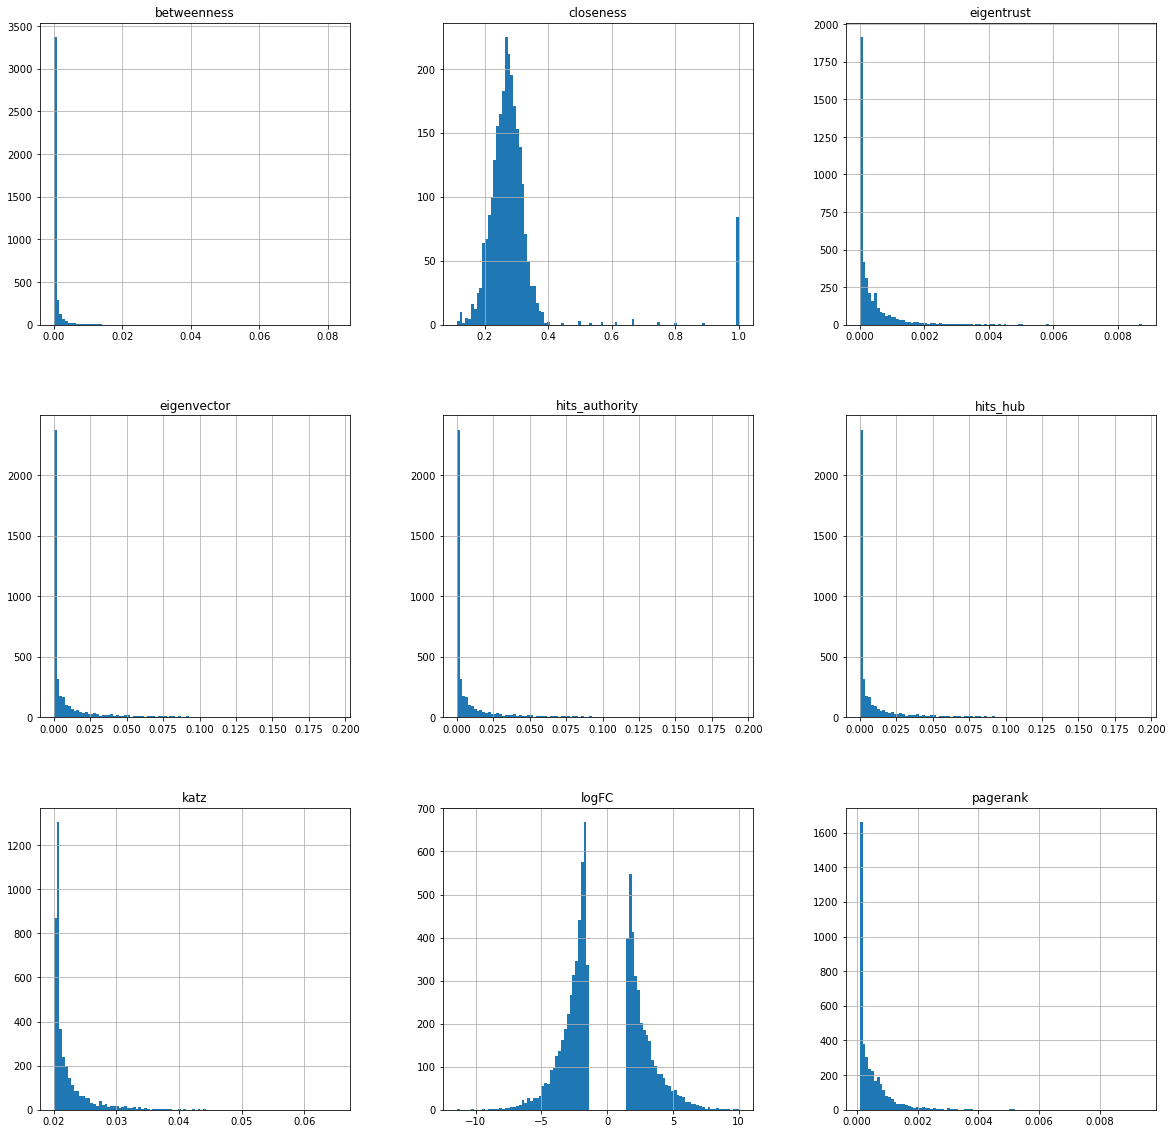

In [17]:
df_topo_concated.hist(figsize=(20,20), bins=100)

# Способы масштабирования признаков 

In [12]:
df_topo_concated_before_scale = df_topo_concated.copy()

# Используя StandardScaler

In [34]:
scaler = StandardScaler()
df_topo_concated_scaled_by_StandardScaler = scaler.fit_transform(df_topo_concated_before_scale)
df_topo_concated_scaled_by_StandardScaler = pd.DataFrame(df_topo_concated_scaled_by_StandardScaler)
df_topo_concated_scaled_by_StandardScaler.columns = df_topo_concated_before_scale.columns
df_topo_concated_scaled_by_StandardScaler.index = df_topo_concated_before_scale.index
df_topo_concated_scaled_by_StandardScaler.head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust
AADAC,3.412757,-0.270940,-0.389918,-0.809207,-0.578665,-0.441983,-0.441983,-0.441983,-0.536650
KRTAP1-5,3.307154,-0.270940,-0.402308,1.467684,-0.577381,-0.442554,-0.442554,-0.442554,-0.341427
MMP3,3.181034,0.401136,0.968932,0.167671,1.108382,0.695062,0.695062,0.695062,2.072715
IL6,3.083696,0.319068,0.587267,0.012823,0.348525,0.018184,0.018184,0.018184,0.907061
HINT3,3.059408,-0.270940,-0.668916,NaN,-0.643638,-0.442554,-0.442554,-0.442554,-0.579797


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f533b3792b0>,
      dtype=object)

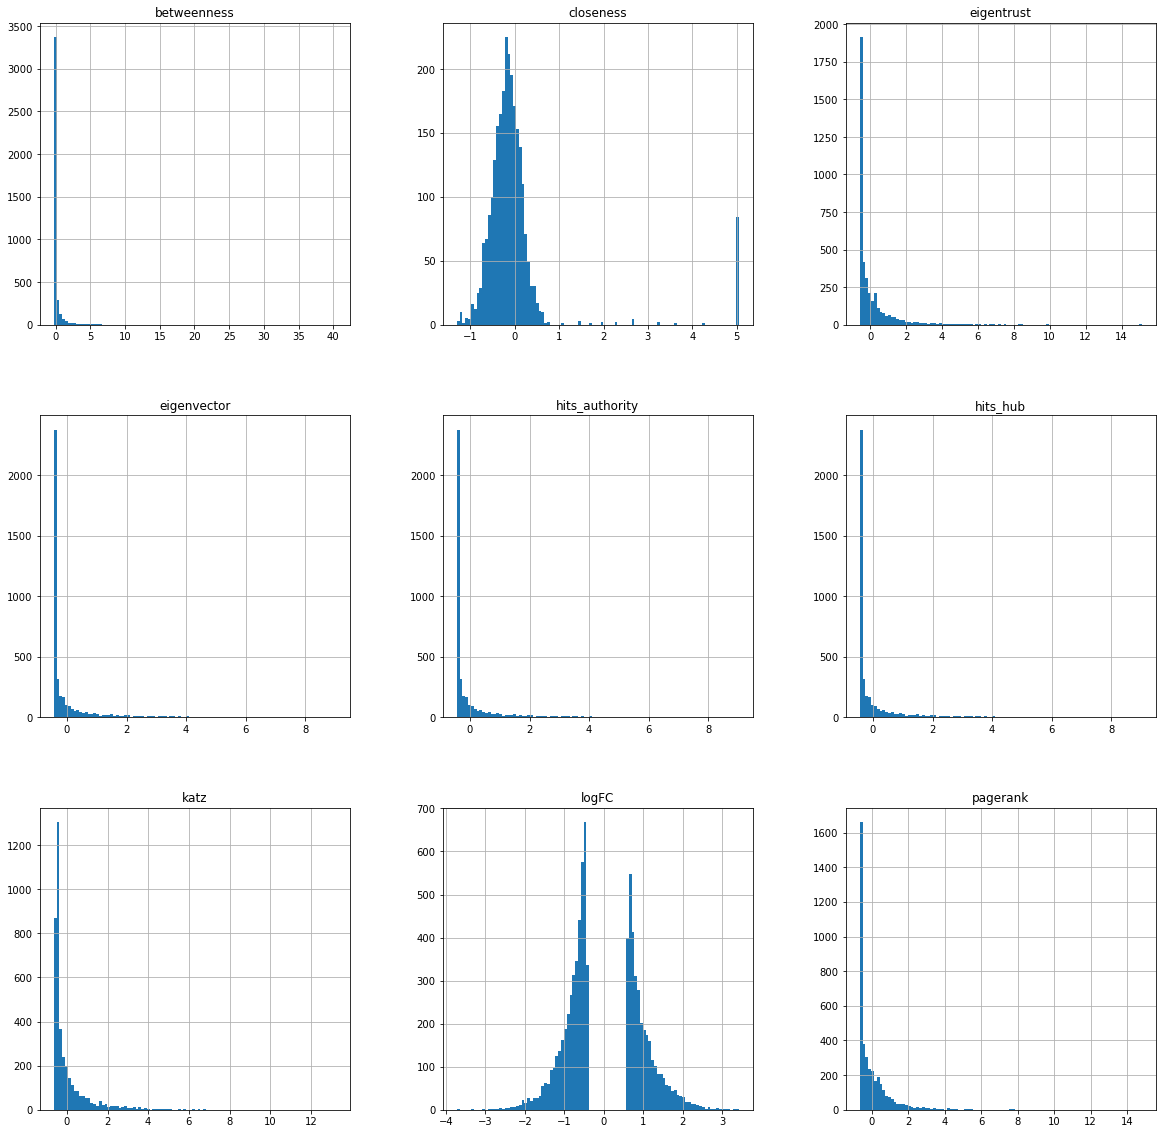

In [35]:
df_topo_concated_scaled_by_StandardScaler.hist(figsize=(20,20), bins=100)

# Используя normalize

In [40]:
df_topo_concated_normalized = df_topo_concated_before_scale.copy()
for i in range(df_topo_concated_normalized.shape[1]):
    df_topo_concated_normalized.iloc[:,i][list(map(lambda x: not x, list(df_topo_concated_normalized.iloc[:,i].isna())))] = normalize(df_topo_concated_before_scale.iloc[:,i][list(map(lambda x: not x, list(df_topo_concated_before_scale.iloc[:,i].isna())))].values.reshape(-1, 1),axis = 0)
df_topo_concated_normalized = pd.DataFrame(df_topo_concated_normalized)
df_topo_concated_normalized.columns = df_topo_concated_before_scale.columns
df_topo_concated_normalized.index = df_topo_concated_before_scale.index
df_topo_concated_normalized.head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust
AADAC,0.037269,0.000000,0.005385,0.010964,0.014317,8.263093e-06,8.263093e-06,8.263095e-06,0.000590
KRTAP1-5,0.036087,0.000000,0.005234,0.030161,0.014320,3.002885e-53,3.002885e-53,1.669840e-51,0.003261
MMP3,0.034675,0.010257,0.021891,0.019200,0.018186,1.644852e-02,1.644852e-02,1.644852e-02,0.036283
IL6,0.033586,0.009004,0.017255,0.017895,0.016443,6.661698e-03,6.661698e-03,6.661699e-03,0.020338
HINT3,0.033314,0.000000,0.001996,NaN,0.014168,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f533a619b50>,
      dtype=object)

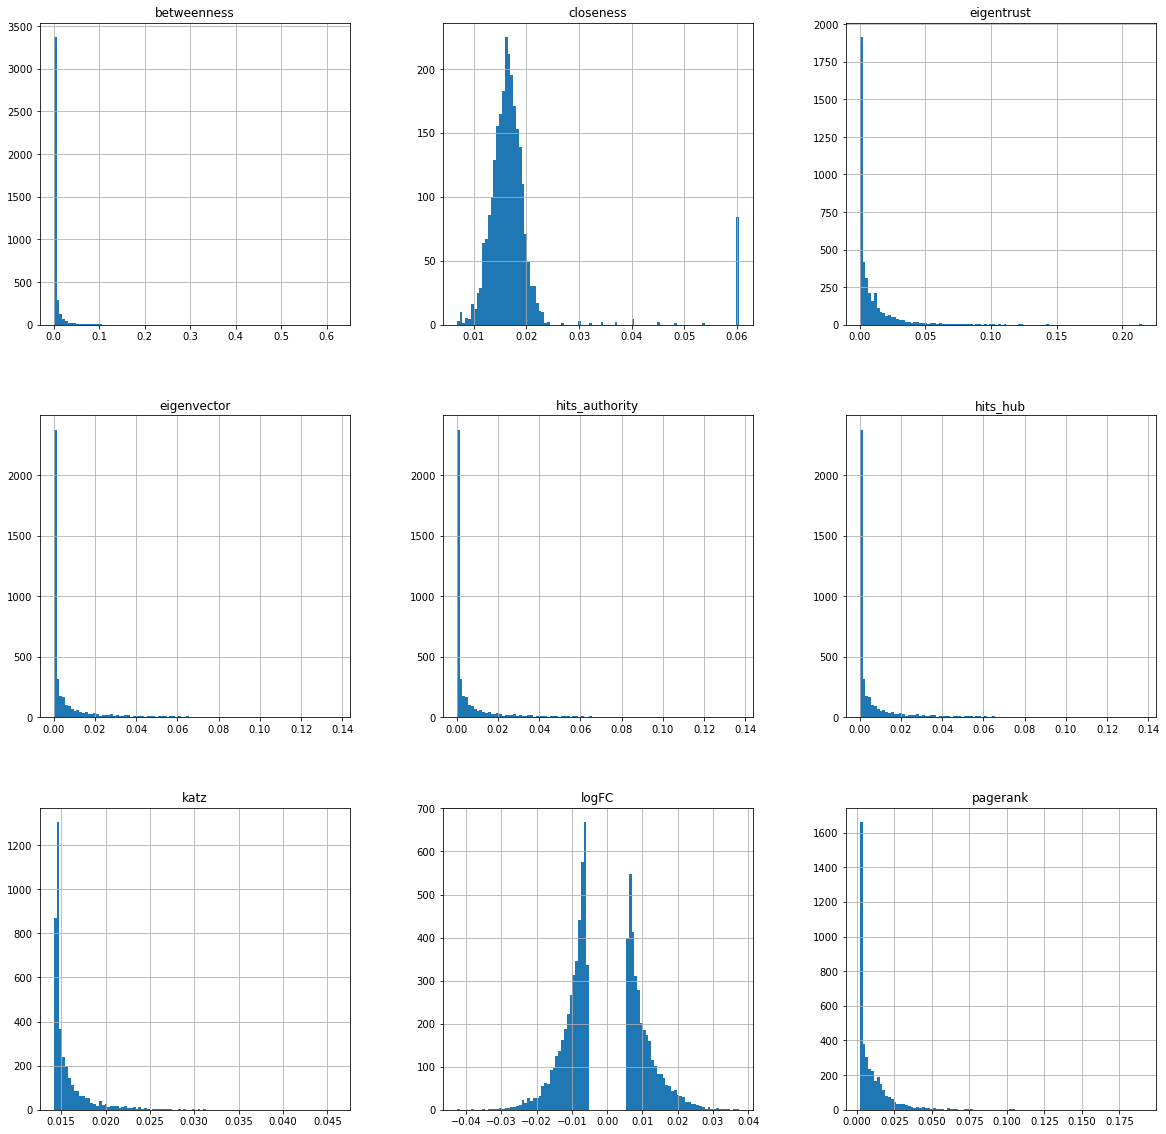

In [41]:
df_topo_concated_normalized.hist(figsize=(20,20), bins=100)

# С помощью MinMaxScaler

Transforms features by scaling each feature to a given range.
This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.

In [27]:
min_max_scaler = MinMaxScaler()
df_topo_concated_MinMaxScaler = min_max_scaler.fit_transform(df_topo_concated_before_scale)
df_topo_concated_MinMaxScaler = pd.DataFrame(df_topo_concated_MinMaxScaler)
df_topo_concated_MinMaxScaler.index = df_topo_concated_before_scale.index
df_topo_concated_MinMaxScaler.columns = df_topo_concated_before_scale.columns
df_topo_concated_MinMaxScaler.head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust
AADAC,1.000000,0.000000,0.018039,0.078547,0.004689,6.043745e-05,6.043745e-05,6.043745e-05,0.002749
KRTAP1-5,0.985208,0.000000,0.017238,0.436931,0.004782,2.196353e-52,2.196353e-52,1.221345e-50,0.015185
MMP3,0.967541,0.016552,0.105895,0.232309,0.126440,1.203068e-01,1.203068e-01,1.203068e-01,0.168972
IL6,0.953907,0.014531,0.081218,0.207935,0.071602,4.872461e-02,4.872461e-02,4.872461e-02,0.094717
HINT3,0.950504,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64ba240fd0>,
      dtype=object)

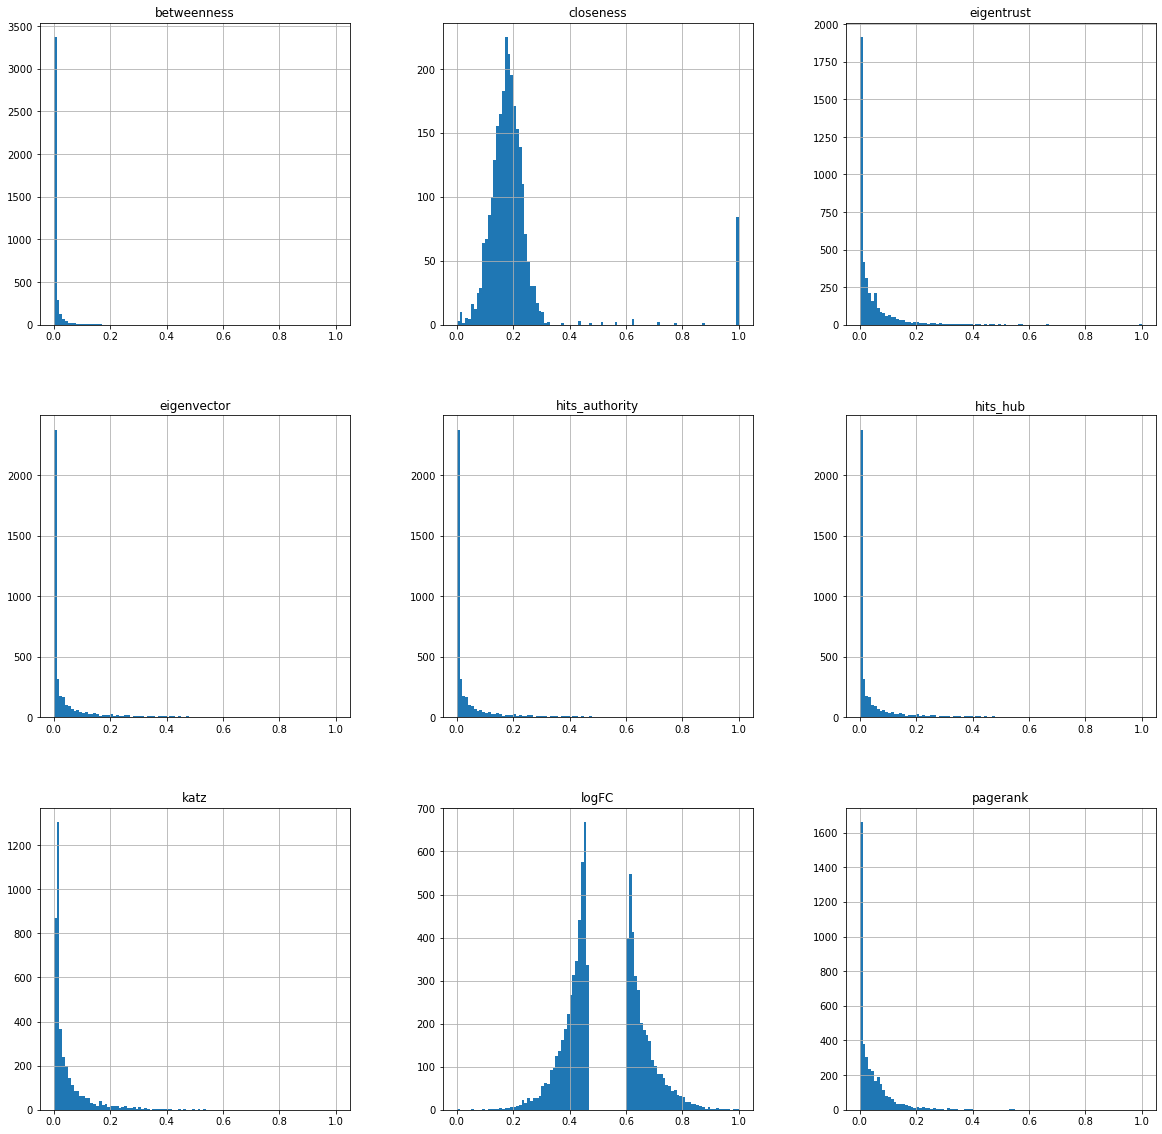

In [28]:
df_topo_concated_MinMaxScaler.hist(figsize=(20,20), bins=100)

# Сначала взять по модулю  logFC и затем нормализовать

In [23]:
df_topo_concated_before_scale_positive_logFC = df_topo_concated.copy()
df_topo_concated_before_scale_positive_logFC['logFC'] = abs(df_topo_concated_before_scale_positive_logFC['logFC'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64ba5301c0>,
      dtype=object)

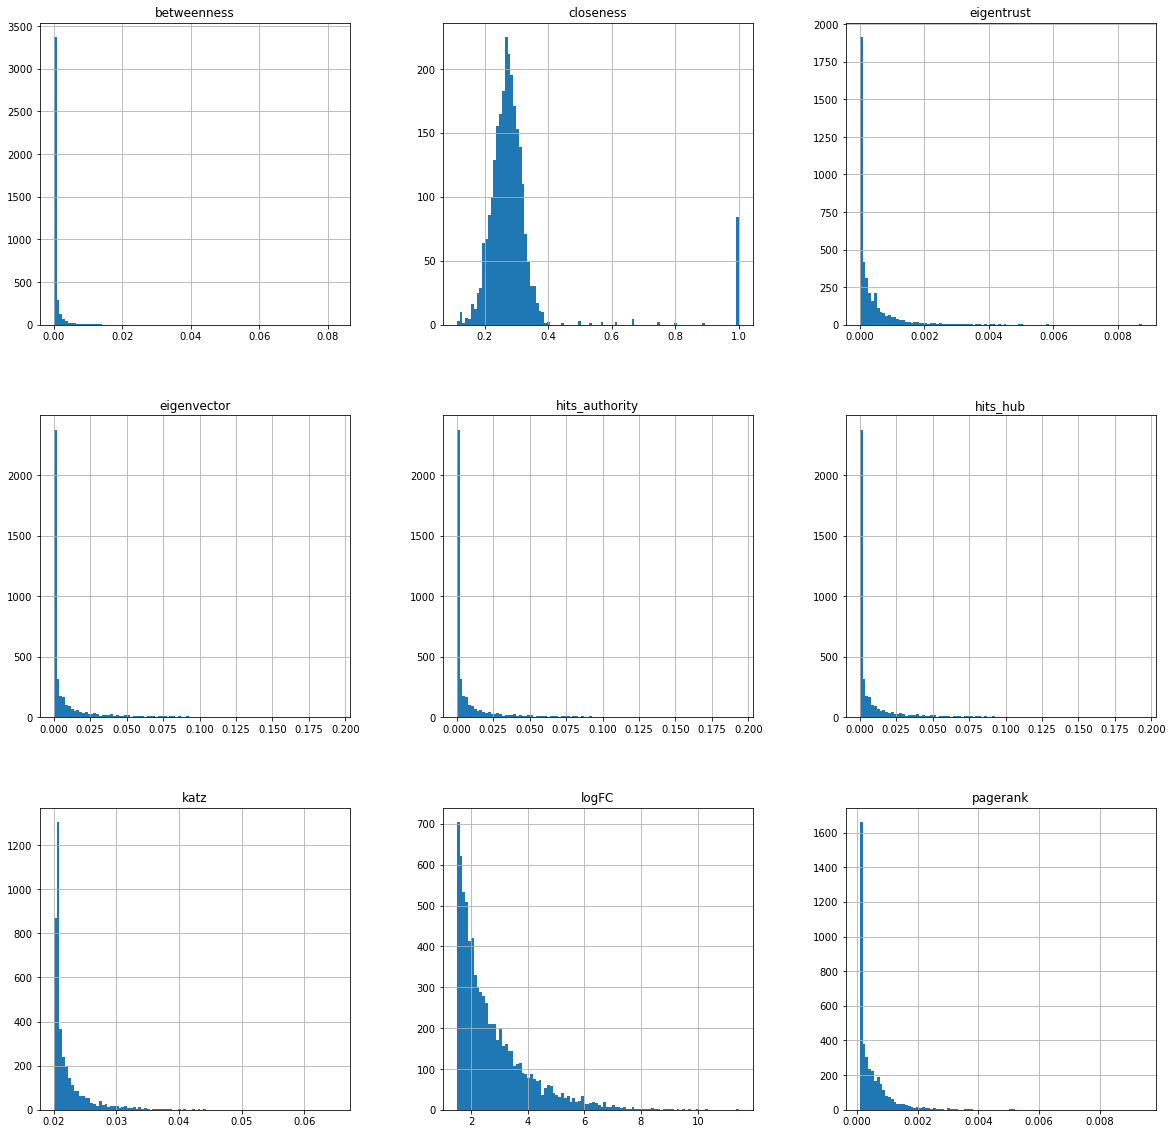

In [24]:
df_topo_concated_before_scale_positive_logFC.hist(figsize=(20,20), bins=100)

In [29]:
min_max_scaler = MinMaxScaler()
df_topo_concated_positive_logFC_MinMaxScaler = min_max_scaler.fit_transform(df_topo_concated_before_scale_positive_logFC)
df_topo_concated_positive_logFC_MinMaxScaler = pd.DataFrame(df_topo_concated_positive_logFC_MinMaxScaler)
df_topo_concated_positive_logFC_MinMaxScaler.index = df_topo_concated_before_scale.index
df_topo_concated_positive_logFC_MinMaxScaler.columns = df_topo_concated_before_scale.columns
df_topo_concated_positive_logFC_MinMaxScaler.head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust
AADAC,0.855064,0.000000,0.018039,0.078547,0.004689,6.043745e-05,6.043745e-05,6.043745e-05,0.002749
KRTAP1-5,0.823158,0.000000,0.017238,0.436931,0.004782,2.196353e-52,2.196353e-52,1.221345e-50,0.015185
MMP3,0.785053,0.016552,0.105895,0.232309,0.126440,1.203068e-01,1.203068e-01,1.203068e-01,0.168972
IL6,0.755644,0.014531,0.081218,0.207935,0.071602,4.872461e-02,4.872461e-02,4.872461e-02,0.094717
HINT3,0.748306,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64b81f7e20>,
      dtype=object)

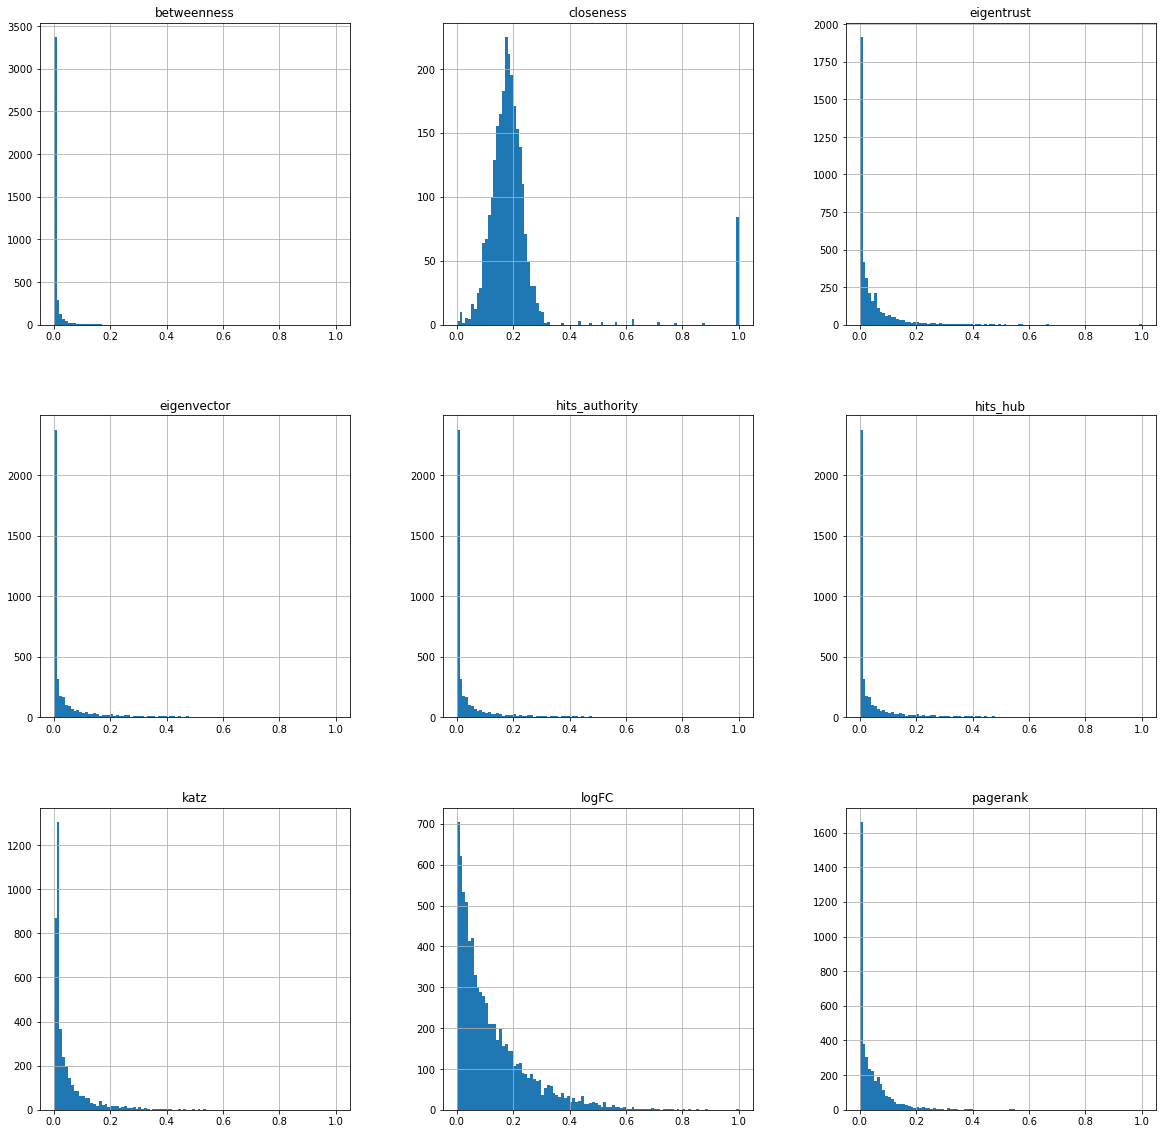

In [30]:
df_topo_concated_positive_logFC_MinMaxScaler.hist(figsize=(20,20), bins=100)